In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv',index_col='subject_id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 10002760 to 19998591
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hospital_expire_flag          3748 non-null   int64  
 1   Lactate                       3450 non-null   float64
 2   Sodium                        3746 non-null   float64
 3   Potassium                     3746 non-null   float64
 4   Cardiac Index                 135 non-null    float64
 5   Cardiac Output                803 non-null    float64
 6   BUN_Avg                       3738 non-null   float64
 7   WBC                           3746 non-null   float64
 8   Hemoglobin                    3746 non-null   float64
 9   PH                            3249 non-null   float64
 10  Systolic Blood Pressure       2050 non-null   float64
 11  Diastolic Blood Pressure      2052 non-null   float64
 12  Central Venous Pressure, CVP  1624 non-null   float64
 1

In [4]:
df.describe()

,hospital_expire_flag,Lactate,Sodium,Potassium,Cardiac Index,Cardiac Output,BUN_Avg,WBC,Hemoglobin,PH,...,cardiovascular_flag,lvh_flag,pulmonary_hypertension_flag,ards_severity_flag,sepsis_flag,septic_shock_flag,cardiogenic_shock_flag,Creatinine (serum),EtCO2,Central Venous Pressure
count,3748.000000,3450.000000,3746.000000,3746.000000,135.000000,803.000000,3738.000000,3746.000000,3746.000000,3249.000000,...,3748.00000,3748.0,3748.000000,3748.000000,3748.000000,3748.0,3748.0,3739.000000,727.000000,1624.000000
mean,0.134205,2.036252,138.751805,4.259517,3.941407,5.140012,91.683304,11.490646,10.134725,673.570776,...,0.63794,0.0,0.119264,0.002401,0.106190,0.0,0.0,2.005579,34.660151,14.671010
std,0.340918,1.256916,3.548573,0.358862,7.724192,1.391561,2190.751866,6.679699,1.587577,24895.180429,...,0.48066,0.0,0.324142,0.048951,0.308122,0.0,0.0,1.728926,7.374390,17.370173
min,0.000000,0.500000,117.600000,3.210000,1.500000,2.200000,4.000000,0.880000,5.840000,5.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.080000,5.000000,-4.000000
25%,0.000000,1.360000,136.682500,4.020000,2.405000,4.210000,19.250000,8.080000,9.020000,7.090000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.940000,30.570000,8.780000
50%,0.000000,1.750000,138.790000,4.220000,2.830000,4.910000,30.330000,10.280000,9.880000,7.300000,...,1.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.420000,34.560000,11.490000
75%,0.000000,2.300000,140.800000,4.440000,3.500000,5.920000,47.800000,13.157500,10.990000,7.380000,...,1.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.340000,38.315000,15.107500
max,1.000000,18.930000,163.150000,6.540000,78.080000,12.340000,111120.440000,172.390000,17.270000,999999.000000,...,1.00000,0.0,1.000000,1.000000,1.000000,0.0,0.0,17.030000,98.000000,321.000000


## data cleaning

In [6]:
#Drop first column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [7]:
#Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
#  Remove columns with more than 50% missing values
threshold = 0.5 * len(df) 
df_filled = df.loc[:, df.isnull().sum() <= threshold]

In [9]:
# Step 4: Handle missing values
# Numeric columns: fill with mean
numeric_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
df_filled.head(3)

C:\Users\a9191\AppData\Local\Temp\ipykernel_22656\407073112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[col] = df_filled[col].fillna(df_filled[col].mean())


,hospital_expire_flag,lactate,sodium,potassium,bun_avg,wbc,hemoglobin,ph,systolic_blood_pressure,diastolic_blood_pressure,...,ckd_flag,copd_flag,cardiovascular_flag,lvh_flag,pulmonary_hypertension_flag,ards_severity_flag,sepsis_flag,septic_shock_flag,cardiogenic_shock_flag,creatinine_(serum)
subject_id,,,,,,,,,,,,,,,,,,,,,
10002760,0,2.06,140.33,4.80,18.00,12.30,10.30,7.310000,108.430000,57.520000,...,0,0,0,0,1,0,0,0,0,0.90
10010471,1,2.13,136.18,5.03,47.00,11.34,9.50,673.570776,115.075141,57.272534,...,1,1,1,0,0,0,0,0,0,5.52
10013310,0,1.56,140.95,4.49,38.93,8.84,9.33,6.790000,115.075141,57.272534,...,1,0,1,0,0,0,0,0,0,1.32


In [10]:
label_encoders = {}

for col in ['gender', 'ethnicity']:
    if col in df_filled.columns:
        le = LabelEncoder()
        df_filled[col] = le.fit_transform(df_filled[col].astype(str))  # Ensure string type for consistency
        label_encoders[col] = le

C:\Users\a9191\AppData\Local\Temp\ipykernel_22656\2810223223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[col] = le.fit_transform(df_filled[col].astype(str))  # Ensure string type for consistency
C:\Users\a9191\AppData\Local\Temp\ipykernel_22656\2810223223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[col] = le.fit_transform(df_filled[col].astype(str))  # Ensure string type for consistency


In [11]:
data_cleaned = df_filled.drop_duplicates()

In [12]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 10002760 to 19998591
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_expire_flag         3748 non-null   int64  
 1   lactate                      3748 non-null   float64
 2   sodium                       3748 non-null   float64
 3   potassium                    3748 non-null   float64
 4   bun_avg                      3748 non-null   float64
 5   wbc                          3748 non-null   float64
 6   hemoglobin                   3748 non-null   float64
 7   ph                           3748 non-null   float64
 8   systolic_blood_pressure      3748 non-null   float64
 9   diastolic_blood_pressure     3748 non-null   float64
 10  respiratory_rate             3748 non-null   float64
 11  spo2                         3748 non-null   float64
 12  arterial_o2_pressure         3748 non-null   float64
 13  temperature 

In [13]:
binary_cols = ['gender', 'hospital_expire_flag', 'sepsis_flag', 'septic_shock_flag', 
               'cardiogenic_shock_flag', 'lvh_flag', 'pulmonary_hypertension_flag', 'ckd_flag','copd_flag',
               'ards_severity_flag', 'cardiovascular_flag','age', 'ethnicity','diabetes'] 
numeric_cols = [col for col in data_cleaned.columns if col not in binary_cols]

In [14]:

scaler = StandardScaler()
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

normalizer = MinMaxScaler()
data_cleaned[numeric_cols] = normalizer.fit_transform(data_cleaned[numeric_cols])

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 10002760 to 19998591
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_expire_flag         3748 non-null   int64  
 1   lactate                      3748 non-null   float64
 2   sodium                       3748 non-null   float64
 3   potassium                    3748 non-null   float64
 4   bun_avg                      3748 non-null   float64
 5   wbc                          3748 non-null   float64
 6   hemoglobin                   3748 non-null   float64
 7   ph                           3748 non-null   float64
 8   systolic_blood_pressure      3748 non-null   float64
 9   diastolic_blood_pressure     3748 non-null   float64
 10  respiratory_rate             3748 non-null   float64
 11  spo2                         3748 non-null   float64
 12  arterial_o2_pressure         3748 non-null   float64
 13  temperature 

In [15]:
data_cleaned.head(2)

,hospital_expire_flag,lactate,sodium,potassium,bun_avg,wbc,hemoglobin,ph,systolic_blood_pressure,diastolic_blood_pressure,...,ckd_flag,copd_flag,cardiovascular_flag,lvh_flag,pulmonary_hypertension_flag,ards_severity_flag,sepsis_flag,septic_shock_flag,cardiogenic_shock_flag,creatinine_(serum)
subject_id,,,,,,,,,,,,,,,,,,,,,
10002760,0,0.084645,0.499012,0.477477,0.000126,0.066585,0.390201,0.000002,0.510722,0.036770,...,0,0,0,0,1,0,0,0,0,0.048378
10010471,1,0.088443,0.407903,0.546547,0.000387,0.060988,0.320210,0.000669,0.547640,0.036574,...,1,1,1,0,0,0,0,0,0,0.320944


In [16]:
data_cleaned.to_csv('data_cleaned.csv')

## Visulization

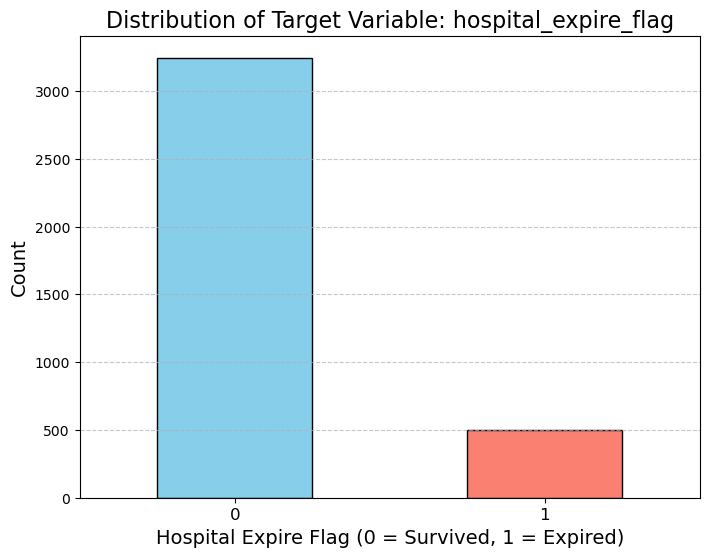

In [19]:
plt.figure(figsize=(8, 6))
data_cleaned['hospital_expire_flag'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Target Variable: hospital_expire_flag', fontsize=16)
plt.xlabel('Hospital Expire Flag (0 = Survived, 1 = Expired)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

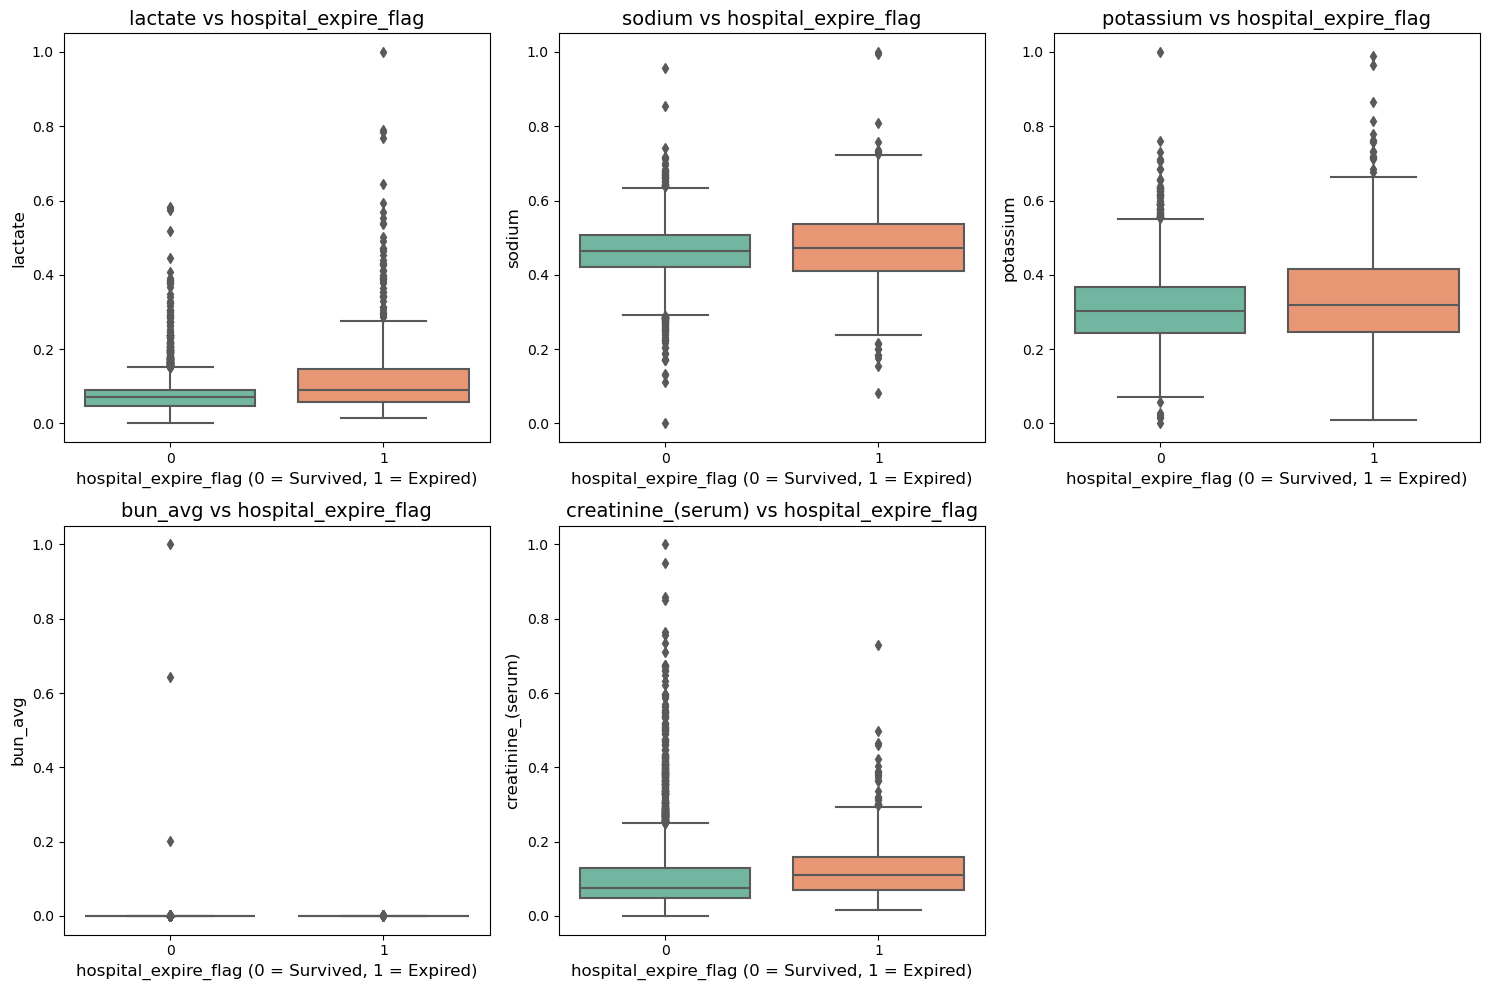

In [20]:
features_to_plot = ['lactate', 'sodium', 'potassium', 'bun_avg', 'creatinine_(serum)']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='hospital_expire_flag', y=feature, data=data_cleaned, palette='Set2')
    plt.title(f'{feature} vs hospital_expire_flag', fontsize=14)
    plt.xlabel('hospital_expire_flag (0 = Survived, 1 = Expired)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

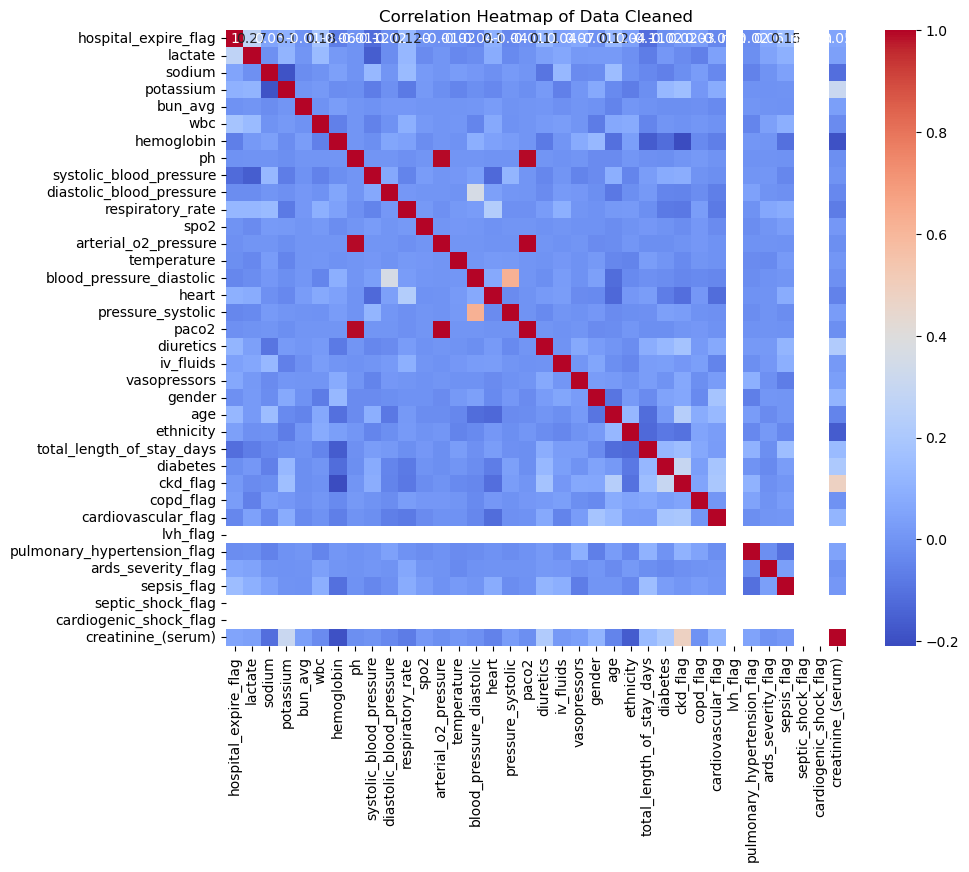

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr() 
annot = correlation_matrix.round(2)

sns.heatmap(correlation_matrix, annot=annot, cmap="coolwarm")
plt.title("Correlation Heatmap of Data Cleaned")
plt.show()